In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10)])

C:\Users\batmunkh.ERDENETMC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.29079548,  0.01524611, -0.7605309 ,  0.52672297,  0.08051052,
        -0.12505451,  0.01875352,  0.2558423 , -0.34142488, -0.5350866 ]],
      dtype=float32)

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.07872708, 0.10691443, 0.04921763, 0.17830682, 0.11412489,
        0.09291901, 0.10729008, 0.13599595, 0.0748404 , 0.06166375]],
      dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.376027

In [8]:
model.compile(loss=loss_fn,
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8643 - loss: 0.4708
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9541 - loss: 0.1551
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9682 - loss: 0.1055
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9740 - loss: 0.0855
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9780 - loss: 0.0696
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0631
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0526
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9848 - loss: 0.0460
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9857 - loss: 0.0450
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9867 - loss: 0.0399


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9811 - loss: 0.0643


[0.06428098678588867, 0.9811000227928162]

In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [12]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.5880410e-08, 2.3803527e-11, 1.2980847e-06, 5.3316893e-05,
        1.5990413e-15, 1.5331466e-08, 1.4681314e-13, 9.9994469e-01,
        5.5004399e-08, 6.6025518e-07],
       [1.1827382e-10, 1.1697129e-04, 9.9988186e-01, 1.0243714e-06,
        1.0610162e-15, 1.1444273e-07, 1.2123597e-10, 2.1794738e-15,
        1.6798593e-10, 5.4347474e-17],
       [3.5895089e-09, 9.9952996e-01, 2.9756544e-05, 9.0935953e-07,
        1.5847782e-04, 5.1742336e-07, 2.2682609e-06, 9.0450143e-05,
        1.8744760e-04, 2.2057644e-07],
       [9.9995232e-01, 8.9093262e-13, 1.3543196e-07, 1.6385416e-08,
        2.3638953e-09, 2.0616483e-06, 4.3952081e-05, 1.1988165e-07,
        9.5700381e-10, 1.3340943e-06],
       [1.6684714e-07, 4.3449029e-12, 2.0673137e-07, 1.3062473e-08,
        9.9669826e-01, 4.2612719e-08, 8.4055546e-06, 8.5466481e-06,
        2.0253506e-06, 3.2824373e-03]], dtype=float32)>

In [13]:
df = pd.read_csv("../big_data/iris.csv")
#Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# NumPy
X = np.array(X)
y = np.array(y)
# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [15]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu', input_shape=(4,)))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

C:\Users\batmunkh.ERDENETMC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 50)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,451 (21.29 KB)

 Trainable params: 5,451 (21.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
4/4 - 2s - 379ms/step - accuracy: 0.7344 - loss: 0.5183 - val_accuracy: 0.9375 - val_loss: 0.2118
Epoch 2/20
4/4 - 0s - 30ms/step - accuracy: 0.9375 - loss: 0.2702 - val_accuracy: 0.9375 - val_loss: 0.0825
Epoch 3/20
4/4 - 0s - 30ms/step - accuracy: 0.9375 - loss: 0.1050 - val_accuracy: 1.0000 - val_loss: 0.0460
Epoch 4/20
4/4 - 0s - 29ms/step - accuracy: 0.9688 - loss: 0.0727 - val_accuracy: 1.0000 - val_loss: 0.0325
Epoch 5/20
4/4 - 0s - 35ms/step - accuracy: 1.0000 - loss: 0.0349 - val_accuracy: 0.9375 - val_loss: 0.0512
Epoch 6/20
4/4 - 0s - 33ms/step - accuracy: 1.0000 - loss: 0.0259 - val_accuracy: 0.9375 - val_loss: 0.0797
Epoch 7/20
4/4 - 0s - 31ms/step - accuracy: 1.0000 - loss: 0.0221 - val_accuracy: 0.9375 - val_loss: 0.0873
Epoch 8/20
4/4 - 0s - 31ms/step - accuracy: 1.0000 - loss: 0.0168 - val_accuracy: 0.9375 - val_loss: 0.0580
Epoch 9/20
4/4 - 0s - 34ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0269
Epoch 10/20
4/4 - 0s - 32ms

In [20]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0007320257136598229
Train accuracy: 1.0


In [106]:
from tensorflow.keras.utils import to_categorical

df = pd.read_csv("../big_data/iris.csv")
#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)
# Convert label to number
y[y == "Iris-setosa"] = 0
y[y == "Iris-versicolor"] = 1
y[y == "Iris-virginica"] = 2
# One Hot encoder
y = to_categorical(y)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [107]:
# Standardizing
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [108]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

In [109]:
model = tf.keras.Sequential()
model.add(tf.keras.Input((n_input, )))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [110]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 50)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,653 (22.08 KB)

 Trainable params: 5,653 (22.08 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [112]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
5/5 - 1s - 284ms/step - accuracy: 0.7083 - loss: 0.6689 - val_accuracy: 0.7917 - val_loss: 0.3275
Epoch 2/20
5/5 - 0s - 27ms/step - accuracy: 0.8125 - loss: 0.3784 - val_accuracy: 0.7917 - val_loss: 0.2841
Epoch 3/20
5/5 - 0s - 28ms/step - accuracy: 0.9062 - loss: 0.2260 - val_accuracy: 0.7917 - val_loss: 0.3123
Epoch 4/20
5/5 - 0s - 27ms/step - accuracy: 0.9062 - loss: 0.1783 - val_accuracy: 0.7917 - val_loss: 0.2489
Epoch 5/20
5/5 - 0s - 33ms/step - accuracy: 0.9479 - loss: 0.1412 - val_accuracy: 0.8333 - val_loss: 0.2230
Epoch 6/20
5/5 - 0s - 26ms/step - accuracy: 0.9583 - loss: 0.1151 - val_accuracy: 0.7917 - val_loss: 0.2556
Epoch 7/20
5/5 - 0s - 24ms/step - accuracy: 0.9688 - loss: 0.0737 - val_accuracy: 0.9167 - val_loss: 0.1778
Epoch 8/20
5/5 - 0s - 33ms/step - accuracy: 0.9583 - loss: 0.0873 - val_accuracy: 0.9167 - val_loss: 0.1633
Epoch 9/20
5/5 - 0s - 24ms/step - accuracy: 0.9479 - loss: 0.1094 - val_accuracy: 0.8750 - val_loss: 0.2514
Epoch 10/20
5/5 - 0s - 24ms

In [113]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.023677542805671692
Train accuracy: 1.0
Test loss: 0.012819654308259487
Test accuracy: 1.0


In [114]:
df = pd.read_csv("../big_data/train.csv")
#Condition extraction from data frame
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.log(np.array(y).reshape(-1, 1))
X = np.array(X).astype(np.float32)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [115]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_class = 1

In [116]:
model = tf.keras.Sequential()
model.add(tf.keras.Input((n_input, )))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='linear'))

In [117]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                     │ (None, 50)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,553 (21.69 KB)

 Trainable params: 5,553 (21.69 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model.compile(loss='mean_squared_error',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.005),
              metrics=['mse'])

In [119]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
47/47 - 1s - 22ms/step - loss: 1422.2036 - mse: 1431.2251 - val_loss: 20.5581 - val_mse: 20.6603
Epoch 2/20
47/47 - 0s - 5ms/step - loss: 9.5302 - mse: 9.5088 - val_loss: 6.7271 - val_mse: 6.7707
Epoch 3/20
47/47 - 0s - 5ms/step - loss: 2.8062 - mse: 2.8099 - val_loss: 2.2708 - val_mse: 2.2915
Epoch 4/20
47/47 - 0s - 5ms/step - loss: 1.6891 - mse: 1.6843 - val_loss: 1.6098 - val_mse: 1.6111
Epoch 5/20
47/47 - 0s - 5ms/step - loss: 1.2682 - mse: 1.2704 - val_loss: 1.1251 - val_mse: 1.1365
Epoch 6/20
47/47 - 0s - 5ms/step - loss: 0.9516 - mse: 0.9422 - val_loss: 1.5616 - val_mse: 1.5612
Epoch 7/20
47/47 - 0s - 5ms/step - loss: 0.7961 - mse: 0.7943 - val_loss: 1.1304 - val_mse: 1.1450
Epoch 8/20
47/47 - 0s - 5ms/step - loss: 0.7022 - mse: 0.7025 - val_loss: 0.8774 - val_mse: 0.8874
Epoch 9/20
47/47 - 0s - 5ms/step - loss: 0.6515 - mse: 0.6531 - val_loss: 0.7042 - val_mse: 0.7096
Epoch 10/20
47/47 - 0s - 5ms/step - loss: 0.5749 - mse: 0.5759 - val_loss: 0.6597 - val_mse: 0.6669


In [120]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train mse:', train_score[1])
print('Test loss:', test_score[0])
print('Test mse:', test_score[1])

Train loss: 0.3605479896068573
Train mse: 0.36168912053108215
Test loss: 1.0147395133972168
Test mse: 1.0472908020019531


In [210]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [211]:
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (10000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(y_test.shape)
print(X_train[0].dtype) # uint8

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8


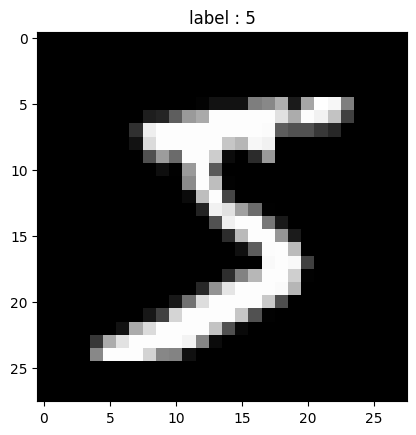

In [212]:
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [213]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [214]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train = X_train / 255.0
X_test = X_test / 255.0

enc = OneHotEncoder(handle_unknown='ignore')
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot.toarray(), test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(48000, 784)
(10000, 784)


In [215]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

In [216]:
model = tf.keras.Sequential()
model.add(tf.keras.Input((n_input, )))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [217]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                     │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,360 (177.19 KB)

 Trainable params: 45,360 (177.19 KB)

 Non-trainable params: 0 (0.00 B)

In [218]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.005),
              metrics=['accuracy'])

In [219]:
X_train.dtype

dtype('float64')

In [220]:
y_train.dtype

dtype('float64')

In [221]:
X_val.dtype

dtype('float64')

In [222]:
y_val.dtype

dtype('float64')

In [223]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7452 - loss: 0.9465 - val_accuracy: 0.9048 - val_loss: 0.3395
Epoch 2/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9078 - loss: 0.3199 - val_accuracy: 0.9187 - val_loss: 0.2853
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9231 - loss: 0.2661 - val_accuracy: 0.9272 - val_loss: 0.2553
Epoch 4/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9272 - loss: 0.2475 - val_accuracy: 0.9323 - val_loss: 0.2381
Epoch 5/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9339 - loss: 0.2312 - val_accuracy: 0.9365 - val_loss: 0.2231
Epoch 6/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9418 - loss: 0.2013 - val_accuracy: 0.9394 - val_loss: 0.2128
Epoch 7/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9432 - loss: 0.1966 - val_accuracy: 0.9429 - val_loss: 0.2024
Epoch 8/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9465 - loss: 0.1864 - 

In [225]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test_one_hot.toarray(), verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.16544109582901
Train accuracy: 0.9520416855812073
Test loss: 0.17269451916217804
Test accuracy: 0.948199987411499
